# The purpose of this notebook is to evaluate different representations by using T-SNE for dimensionality reduction and visualization

We evaluate the following:
1. TiFGAN features
2. Post-hoc encoder features
3. BiTiFGAN features
4. MFCC features
5. FBANK features
6. TiFGAN discriminator features

## Import packages

In [18]:
import os
os.chdir(os.path.join("/", "home", "c-matsty", "Bi-TiFGAN---TensorFlow-1.14", "src"))

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
from sklearn.manifold import TSNE

from feature_evaluation.utils import load_data, load_data_labels

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

## Path to datasets with SpeechCommands representations

In [3]:
data_dir = os.path.join("/media", "datastore", "c-matsty-data", "datasets", "SpeechCommands")

## 1. TiFGAN feature visualization with T-SNE

### Paths to the input data, labels and actors

In [4]:
train_dir = os.path.join(data_dir, "SpeechCommands_Preproc_2_training")
train_input_path = os.path.join(train_dir, "input_data")
train_labels_path = os.path.join(train_dir, "labels")
train_actors_path = os.path.join(train_dir, "actors")

In [5]:
test_dir = os.path.join(data_dir, "SpeechCommands_Preproc_2_test")
test_input_path = os.path.join(test_dir, "input_data")
test_labels_path = os.path.join(test_dir, "labels")
test_actors_path = os.path.join(test_dir, "actors")

### Load data

In [ ]:
X_tr = load_data(train_input_path)
X_ts = load_data(test_input_path)

  0%|          | 0/165 [00:00<?, ?it/s]

Loading data


 31%|███       | 51/165 [00:10<00:22,  5.02it/s]

### Load labels

In [ ]:
print("-Read label meta-data for training and test dataset samples.")
y_tr = load_data_labels(train_labels_path)
y_ts = load_data_labels(test_labels_path)
label_dict = {value: index for index, value in enumerate(np.unique(y_tr))}
y_tr = np.vectorize(label_dict.get)(y_tr)
y_ts = np.vectorize(label_dict.get)(y_ts)

### Load actors

In [ ]:
print("-Read actor meta-data for training and test dataset samples.")
a_tr = load_data_labels(train_actors_path)
a_ts = load_data_labels(test_actors_path)

### Prepare data for T-SNE

In [ ]:
X_tr = X_tr.reshape((X_tr.shape[0], -1))
X_ts = X_ts.reshape((X_ts.shape[0], -1))

### Train T-SNE model and transform data to 2-D representation

In [ ]:
X_tr_embedded = TSNE(n_components=2, perplexity=50, n_jobs=20).fit_transform(X_tr)

In [ ]:
X_ts_embedded = TSNE(n_components=2, perplexity=10, n_jobs=20).fit_transform(X_ts)

### TiFGAN features embedded on a 2-D space by T-SNE - Colored by keyword

In [19]:
def scatterplot_colored_labels(X_embedded, labels, title, legend=True, save_path=None):
    # Set plot size
    plt.rcParams[('figure.figsize')] = (10, 10)
    # Get unique labels
    unique_labels = np.unique(labels)
    # Get distinct colors, as many as distinct labels
    all_colours = [k for k,v in pltc.cnames.items()]
    
    # If there are enough colours sample without replacement
    replace = True if len(unique_labels) > len(all_colours) else False
    np.random.seed(30000)
    selected_colours = np.random.choice(all_colours, replace=replace, size=len(unique_labels))
    # For each unique label in the dataset
    for i, unique_label in enumerate(unique_labels):
        # Select data with that unique dataset
        X_with_label = X_embedded[labels == unique_label]
        # Create scatter plot with that data
        plt.scatter(X_with_label[:, 0], X_with_label[:, 1], label="Class {}".format(str(unique_label)),
                    c=selected_colours[i], edgecolors='black')
    
    if legend:
        plt.legend()
        
    plt.tight_layout()
    plt.title(title, size=16)
    if save_path is not None:
        plt.savefig(save_path, bbox_inches='tight')
    plt.show()

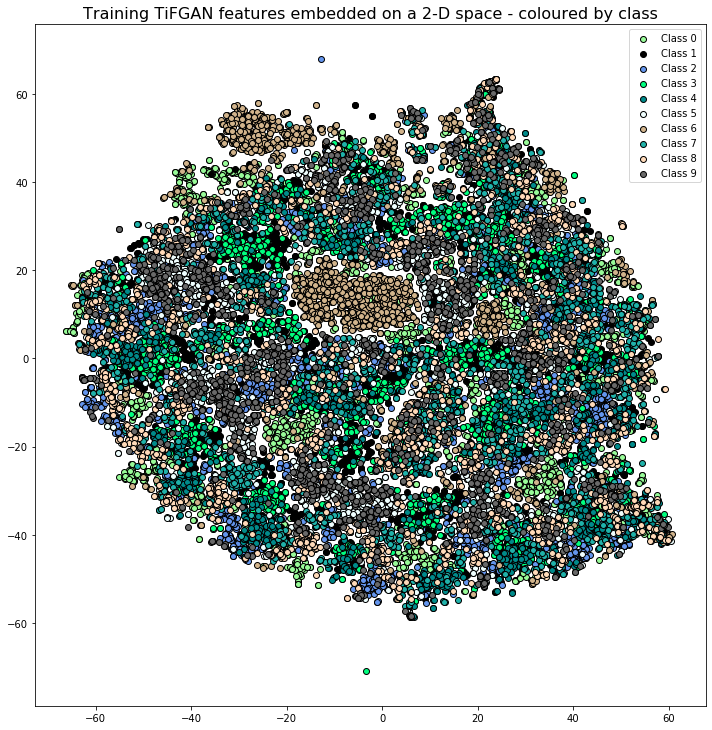

In [20]:
scatterplot_colored_labels(X_tr_embedded, y_tr, "Training TiFGAN features embedded on a 2-D space - coloured by class",
                          save_path="TiFGAN_training_features_keyword_coloring.png")

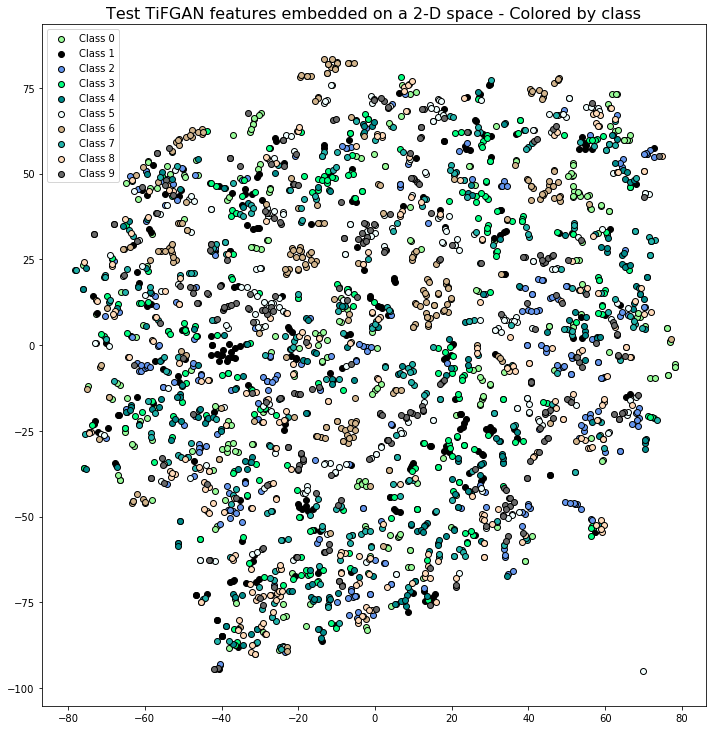

In [21]:
scatterplot_colored_labels(X_ts_embedded, y_ts, "Test TiFGAN features embedded on a 2-D space - Colored by class",
                          save_path="TiFGAN_test_features_keyword_coloring.png")

### TiFGAN features embedded on a 2-D space by T-SNE - Colored by speaker

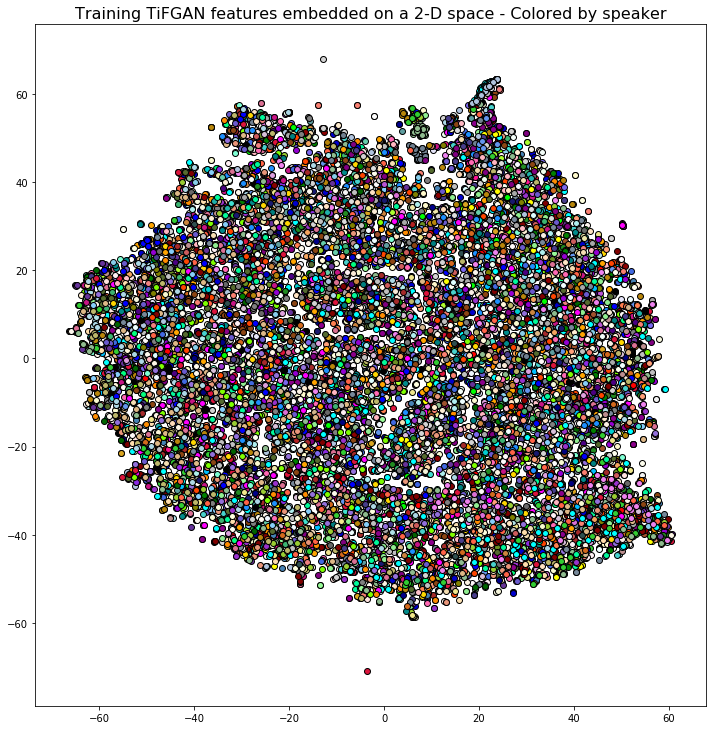

In [22]:
scatterplot_colored_labels(X_tr_embedded, a_tr, "Training TiFGAN features embedded on a 2-D space - Colored by speaker", legend=False,
                          save_path="TiFGAN_training_features_speaker_coloring.png")

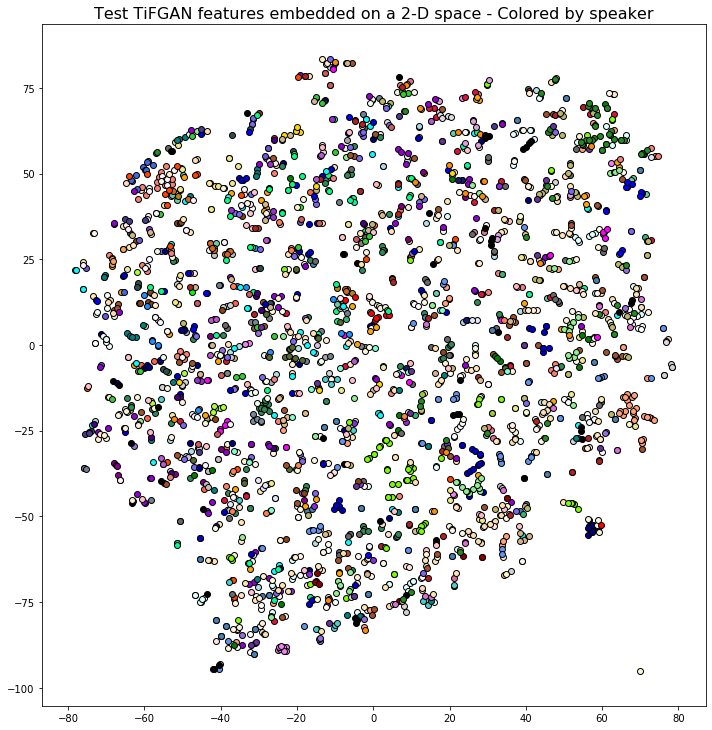

In [23]:
scatterplot_colored_labels(X_ts_embedded, a_ts, "Test TiFGAN features embedded on a 2-D space - Colored by speaker", legend=False,
                          save_path="TiFGAN_test_features_speaker_coloring.png")

## 2. Post-hoc encoder feature visualization with T-SNE

### Paths to the training and test data

In [24]:
posthoc_encoder_dir = os.path.join(data_dir, "Posthoc_encoder_features")
train_input_path = os.path.join(posthoc_encoder_dir, "training.npy")
test_input_path = os.path.join(posthoc_encoder_dir, "test.npy")

### Load data

In [25]:
X_tr = np.load(train_input_path)
X_ts = np.load(test_input_path)

### Train T-SNE model and transform data to 2-D representation

In [26]:
X_tr_embedded = TSNE(n_components=2, perplexity=50, n_jobs=20).fit_transform(X_tr)

In [27]:
X_ts_embedded = TSNE(n_components=2, perplexity=10, n_jobs=20).fit_transform(X_ts)

### Posthoc-encoder features embedded on a 2-D space by T-SNE - Colored by keyword

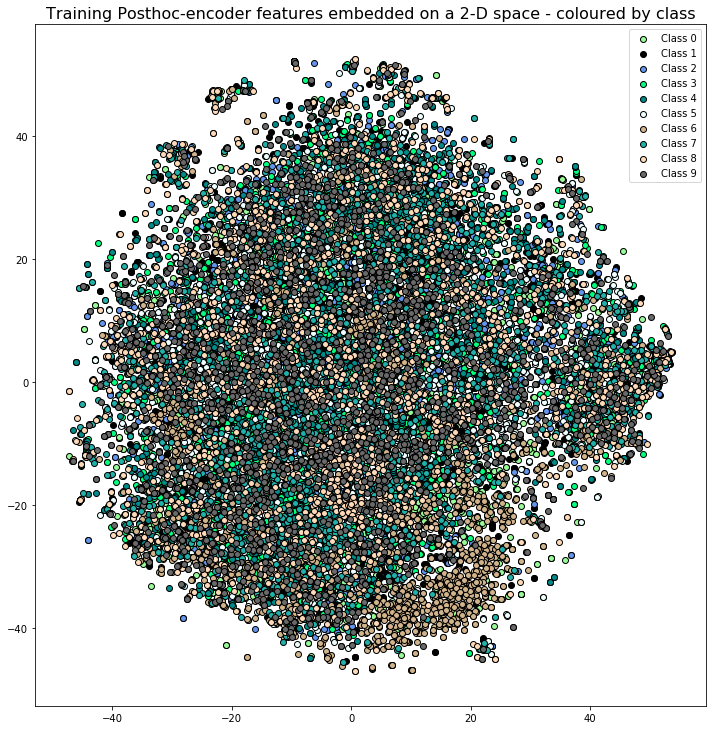

In [28]:
scatterplot_colored_labels(X_tr_embedded, y_tr, "Training Posthoc-encoder features embedded on a 2-D space - coloured by class",
                          save_path="posthoc_training_features_keyword_coloring.png")

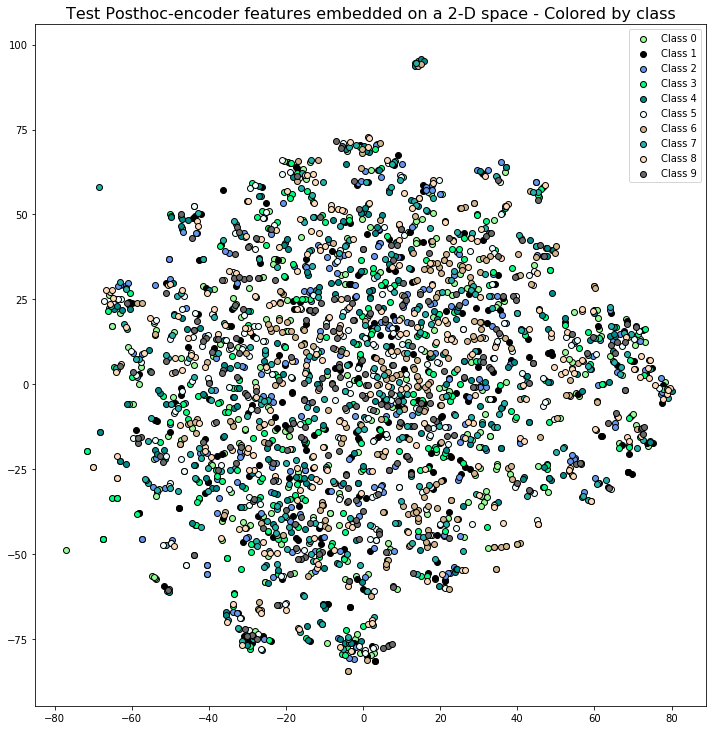

In [29]:
scatterplot_colored_labels(X_ts_embedded, y_ts, "Test Posthoc-encoder features embedded on a 2-D space - Colored by class",
                          save_path="posthoc_test_features_keyword_coloring.png")

### Posthoc-encoder features embedded on a 2-D space by T-SNE - Colored by speaker

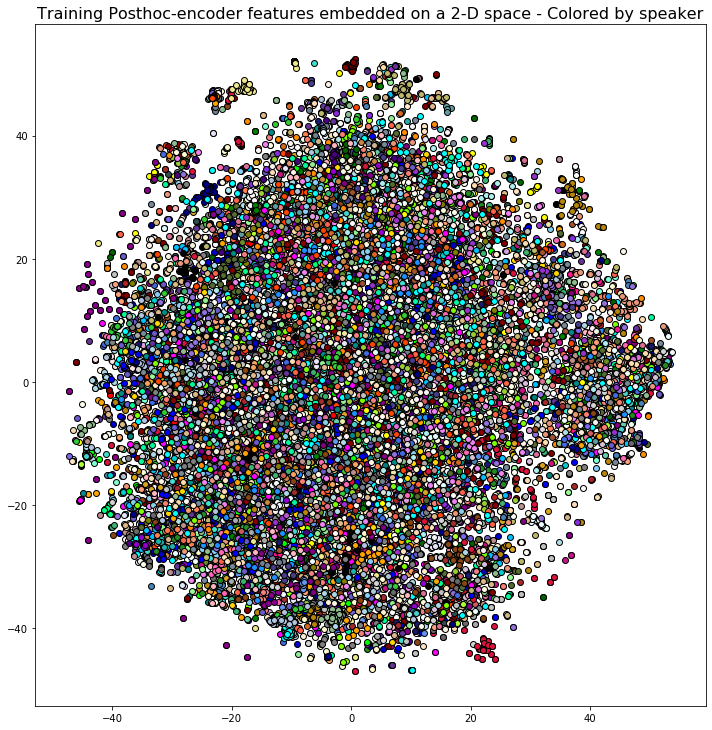

In [30]:
scatterplot_colored_labels(X_tr_embedded, a_tr, "Training Posthoc-encoder features embedded on a 2-D space - Colored by speaker", legend=False,
                          save_path="posthoc_training_features_speaker_coloring.png")

In [31]:
scatterplot_colored_labels(X_ts_embedded, a_ts, "Test TiFGAN features embedded on a 2-D space - Colored by speaker", legend=False,
                           save_path="posthoc_test_features_speaker_coloring.png")

## 3. BiTiFGAN features visualization with T-SNE

### Paths to the training and test data

In [ ]:
bitifgan_feats_dir = os.path.join(data_dir, "Bitifgan_features")
train_input_path = os.path.join(bitifgan_feats_dir, "training.npy")
test_input_path = os.path.join(bitifgan_feats_dir, "test.npy")

### Load data

In [ ]:
X_tr = np.load(train_input_path)
X_ts = np.load(test_input_path)

### Train T-SNE model and transform data to 2-D representation

In [ ]:
X_tr_embedded = TSNE(n_components=2, perplexity=50, n_jobs=20).fit_transform(X_tr)

In [ ]:
X_ts_embedded = TSNE(n_components=2, perplexity=10, n_jobs=20).fit_transform(X_ts)

### BiTiFGAN features embedded on a 2-D space by T-SNE - Colored by keyword

In [ ]:
scatterplot_colored_labels(X_tr_embedded, y_tr, "Training BiTiFGAN features embedded on a 2-D space - coloured by class",
                          save_path="bitifgan_encoder_training_colored_by_keyword.png")

In [ ]:
scatterplot_colored_labels(X_ts_embedded, y_ts, "Test BiTiFGAN features embedded on a 2-D space - Colored by class",
                           save_path="bitifgan_encoder_test_colored_by_keyword.png")

### BiTiFGAN features embedded on a 2-D space by T-SNE - Colored by speaker

In [ ]:
scatterplot_colored_labels(X_tr_embedded, a_tr, "Training BiTiFGAN features embedded on a 2-D space - Colored by speaker", legend=False,
                          save_path="bitifgan_encoder_training_colored_by_speaker.png")                           

In [ ]:
scatterplot_colored_labels(X_ts_embedded, a_ts, "Test BiTiFGAN features embedded on a 2-D space - Colored by speaker", legend=False,
                          save_path="bitifgan_encoder_test_colored_by_speaker.png")

## 4. MFCC features visualization with T-SNE

### Paths to the training and test data

In [32]:
train_input_path = os.path.join(data_dir, "SpeechCommands_Preproc_2_training_MFCC", "input_data")
test_input_path = os.path.join(data_dir, "SpeechCommands_Preproc_2_test_MFCC", "input_data")

### Load data

In [33]:
def load_data(input_path):
    X = []
    for input_file_name in os.listdir(input_path):
        file_name = input_file_name.split(".")[0]
        x = np.load(os.path.join(input_path, input_file_name))
        X.append(x)
    X = np.vstack(X)
    return X

In [34]:
X_tr = load_data(train_input_path)
X_ts = load_data(test_input_path)

In [35]:
X_tr = X_tr.reshape((X_tr.shape[0], -1))
X_ts = X_ts.reshape((X_ts.shape[0], -1))

### Train T-SNE model and transform data to 2-D representation

In [36]:
X_tr_embedded = TSNE(n_components=2, perplexity=50, n_jobs=20).fit_transform(X_tr)

In [37]:
X_ts_embedded = TSNE(n_components=2, perplexity=10, n_jobs=20).fit_transform(X_ts)

### MFCC features embedded on a 2-D space by T-SNE - Colored by keyword

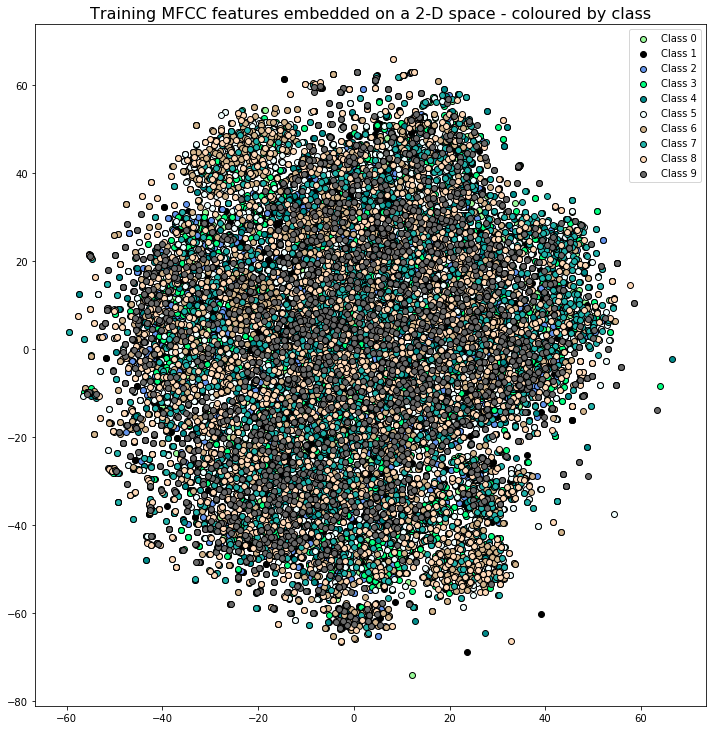

In [38]:
scatterplot_colored_labels(X_tr_embedded, y_tr, "Training MFCC features embedded on a 2-D space - coloured by class",
                          save_path="MFCC_training_features_class_coloring.png")

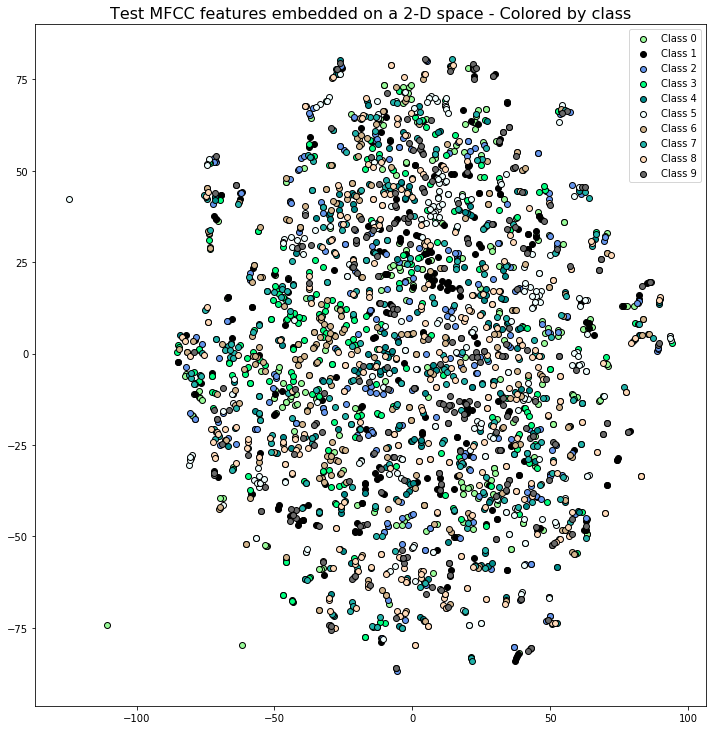

In [39]:
scatterplot_colored_labels(X_ts_embedded, y_ts, "Test MFCC features embedded on a 2-D space - Colored by class",
                          save_path="MFCC_test_features_class_coloring.png")

### MFCC features embedded on a 2-D space by T-SNE - Colored by speaker

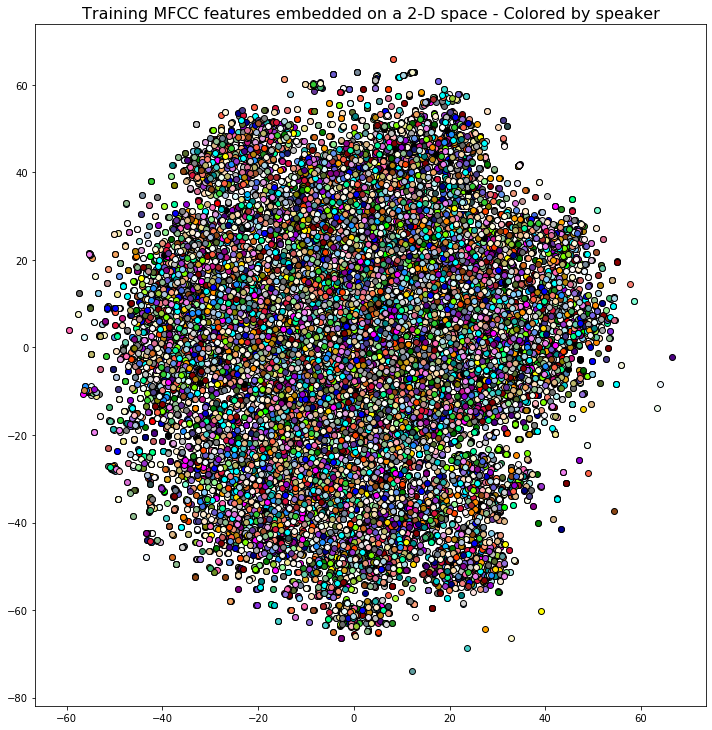

In [40]:
scatterplot_colored_labels(X_tr_embedded, a_tr, "Training MFCC features embedded on a 2-D space - Colored by speaker", legend=False,
                          save_path="MFCC_training_features_speaker_coloring.png")

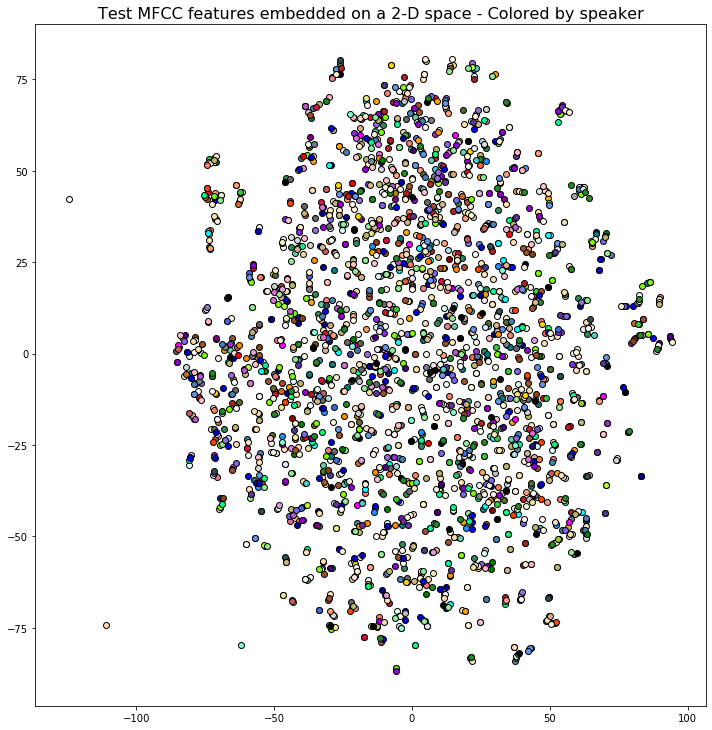

In [41]:
scatterplot_colored_labels(X_ts_embedded, a_ts, "Test MFCC features embedded on a 2-D space - Colored by speaker", legend=False,
                          save_path="MFCC_test_features_speaker_coloring.png")

## 5. FBANK features visualization with T-SNE

### Paths to the training and test data

In [42]:
train_input_path = os.path.join(data_dir, "SpeechCommands_Preproc_2_training_FBANK", "input_data")
test_input_path = os.path.join(data_dir, "SpeechCommands_Preproc_2_test_FBANK", "input_data")

### Load data

In [43]:
X_tr = load_data(train_input_path)
X_ts = load_data(test_input_path)

In [44]:
X_tr = X_tr.reshape((X_tr.shape[0], -1))
X_ts = X_ts.reshape((X_ts.shape[0], -1))

### Train T-SNE model and transform data to 2-D representation

In [45]:
X_tr_embedded = TSNE(n_components=2, perplexity=50, n_jobs=20).fit_transform(X_tr)

In [46]:
X_ts_embedded = TSNE(n_components=2, perplexity=10, n_jobs=20).fit_transform(X_ts)

### FBANK features embedded on a 2-D space by T-SNE - Colored by keyword

In [47]:
scatterplot_colored_labels(X_tr_embedded, y_tr, "Training FBANK features embedded on a 2-D space - coloured by class",
                          save_path="FBANK_training_features_class_coloring.png")

In [48]:
scatterplot_colored_labels(X_ts_embedded, y_ts, "Test FBANK features embedded on a 2-D space - Colored by class",
                          save_path="FBANK_test_features_class_coloring.png")

### FBANK features embedded on a 2-D space by T-SNE - Colored by speaker

In [49]:
scatterplot_colored_labels(X_tr_embedded, a_tr, "Training FBANK features embedded on a 2-D space - Colored by speaker", legend=False,
                          save_path="FBANK_training_features_speaker_coloring.png")

In [50]:
scatterplot_colored_labels(X_ts_embedded, a_ts, "Test FBANK features embedded on a 2-D space - Colored by speaker", legend=False,
                          save_path="FBANK_test_features_speaker_coloring.png")

## 6. Discriminator features visualization with T-SNE

Perform the same T-SNE visualizations on the features extracted for different discriminator layers when global pooling is applied along the filter dimensions.

### Paths to the training and test data features extracted from the last layer

In [51]:
discr_features_dirname = "Discriminator_features"
training_input_path = os.path.join(data_dir, discr_features_dirname, "SC09_training_discriminator_features_4th_conv.npy")
test_input_path = os.path.join(data_dir, discr_features_dirname, "SC09_test_discriminator_features_4th_conv.npy")

### Load data

In [52]:
X_tr = np.load(training_input_path)
X_ts = np.load(test_input_path)

In [53]:
X_tr = X_tr.reshape((X_tr.shape[0], -1))
X_ts = X_ts.reshape((X_ts.shape[0], -1))

### Train T-SNE model and transform data to 2-D representation

In [54]:
X_tr_embedded = TSNE(n_components=2, perplexity=50, n_jobs=20).fit_transform(X_tr)

In [55]:
X_ts_embedded = TSNE(n_components=2, perplexity=10, n_jobs=20).fit_transform(X_ts)

### Discriminator's last layer (5th) features embedded on a 2-D space by T-SNE - Colored by keyword

In [56]:
scatterplot_colored_labels(X_tr_embedded, y_tr, "Training discriminator last layer features embedded on a 2-D space - coloured by class",
                           save_path="discriminator_5th_layer_colored_by_keyword_training.png")

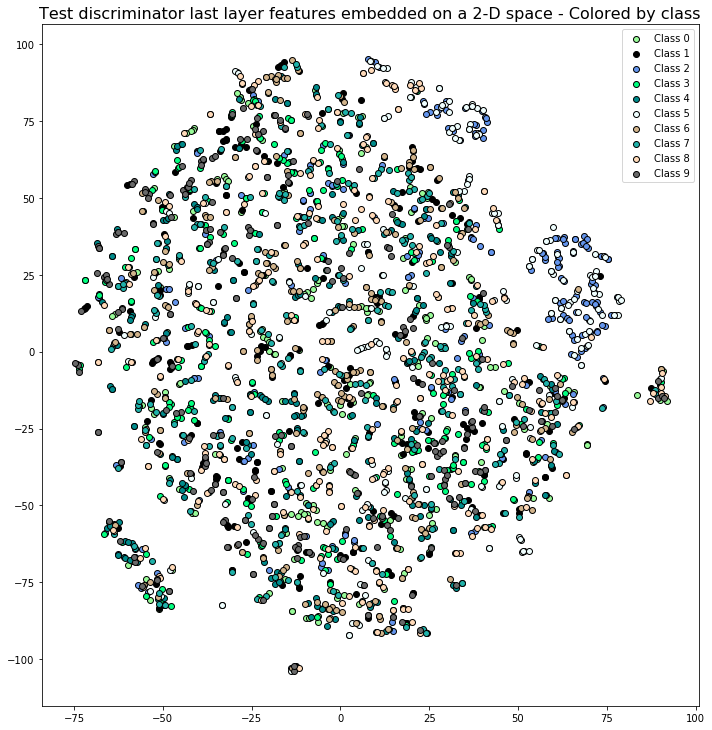

In [57]:
scatterplot_colored_labels(X_ts_embedded, y_ts, "Test discriminator last layer features embedded on a 2-D space - Colored by class",
                           save_path="discriminator_5th_layer_colored_by_keyword_test.png")

### Discriminator's last layer (5th) features embedded on a 2-D space by T-SNE - Colored by speaker

In [58]:
scatterplot_colored_labels(X_tr_embedded, a_tr, "Training discriminator last layer features embedded on a 2-D space - Colored by speaker", legend=False,
                           save_path="discriminator_5th_layer_colored_by_speaker_training.png")

In [59]:
scatterplot_colored_labels(X_ts_embedded, a_ts, "Test discriminator last layer features embedded on a 2-D space - Colored by speaker", legend=False,
                           save_path="discriminator_5th_layer_colored_by_speaker_test.png")

### Paths to the training and test data features extracted from the 4th (second to last) layer

In [60]:
training_input_path = os.path.join(data_dir, discr_features_dirname, "SC09_training_discriminator_features_3th_conv.npy")
test_input_path = os.path.join(data_dir, discr_features_dirname, "SC09_test_discriminator_features_3th_conv.npy")

### Load data

In [61]:
X_tr = np.load(training_input_path)
X_ts = np.load(test_input_path)

In [62]:
X_tr = X_tr.reshape((X_tr.shape[0], -1))
X_ts = X_ts.reshape((X_ts.shape[0], -1))

### Train T-SNE model and transform data to 2-D representation

In [ ]:
X_tr_embedded = TSNE(n_components=2, perplexity=50, n_jobs=20).fit_transform(X_tr)

In [ ]:
X_ts_embedded = TSNE(n_components=2, perplexity=10, n_jobs=20).fit_transform(X_ts)

### Discriminator 4th layer features embedded on a 2-D space by T-SNE - Colored by keyword

In [ ]:
scatterplot_colored_labels(X_tr_embedded, y_tr, "Training discriminator 4th layer features embedded on a 2-D space - coloured by class",
                           save_path="discriminator_4th_layer_colored_by_keyword_training.png")

In [ ]:
scatterplot_colored_labels(X_ts_embedded, y_ts, "Test discriminator 4th layer features embedded on a 2-D space - Colored by class",
                          save_path="discriminator_4th_layer_colored_by_keyword_test.png")

### Discriminator 4th layer features embedded on a 2-D space by T-SNE - Colored by speaker

In [ ]:
scatterplot_colored_labels(X_tr_embedded, a_tr, "Training discriminator 4th layer features embedded on a 2-D space - Colored by speaker", legend=False,
                           save_path="discriminator_4th_layer_colored_by_speaker_training.png")

In [ ]:
scatterplot_colored_labels(X_ts_embedded, a_ts, "Test discriminator 4th layer features embedded on a 2-D space - Colored by speaker", legend=False,
                           save_path="discriminator_4th_layer_colored_by_speaker_test.png")

### Paths to the training and test data features extracted from the 3rd layer

In [ ]:
training_input_path = os.path.join(data_dir, discr_features_dirname, "SC09_training_discriminator_features_2th_conv.npy")
test_input_path = os.path.join(data_dir, discr_features_dirname, "SC09_test_discriminator_features_2th_conv.npy")

### Load data

In [ ]:
X_tr = np.load(training_input_path)
X_ts = np.load(test_input_path)

In [ ]:
X_tr = X_tr.reshape((X_tr.shape[0], -1))
X_ts = X_ts.reshape((X_ts.shape[0], -1))

### Train T-SNE model and transform data to 2-D representation

In [ ]:
X_tr_embedded = TSNE(n_components=2, perplexity=50, n_jobs=20).fit_transform(X_tr)

In [ ]:
X_ts_embedded = TSNE(n_components=2, perplexity=10, n_jobs=20).fit_transform(X_ts)

### Discriminator 3rd layer features embedded on a 2-D space by T-SNE - Colored by keyword

In [ ]:
scatterplot_colored_labels(X_tr_embedded, y_tr, "Training discriminator 3rd layer features embedded on a 2-D space - coloured by class",
                           save_path="discriminator_3rd_layer_colored_by_keyword_training.png")

In [ ]:
scatterplot_colored_labels(X_ts_embedded, y_ts, "Test discriminator 3rd layer features embedded on a 2-D space - Colored by class",
                          save_path="discriminator_3rd_layer_colored_by_keyword_test.png")

### Discriminator 3rd layer features embedded on a 2-D space by T-SNE - Colored by speaker

In [ ]:
scatterplot_colored_labels(X_tr_embedded, a_tr, "Training discriminator 3rd layer features embedded on a 2-D space - Colored by speaker", legend=False,
                          save_path="discriminator_3rd_layer_colored_by_speaker_training.png")

In [ ]:
scatterplot_colored_labels(X_ts_embedded, a_ts, "Test discriminator 3rd layer features embedded on a 2-D space - Colored by speaker", legend=False,
                          save_path="discriminator_3rd_layer_colored_by_speaker_test.png")

### Paths to the training and test data features extracted from the 2nd (second to last) layer

In [ ]:
training_input_path = os.path.join(data_dir, discr_features_dirname, "SC09_training_discriminator_features_1th_conv.npy")
test_input_path = os.path.join(data_dir, discr_features_dirname, "SC09_test_discriminator_features_1th_conv.npy")

### Load data

In [ ]:
X_tr = np.load(training_input_path)
X_ts = np.load(test_input_path)

In [ ]:
X_tr = X_tr.reshape((X_tr.shape[0], -1))
X_ts = X_ts.reshape((X_ts.shape[0], -1))

### Train T-SNE model and transform data to 2-D representation

In [ ]:
X_tr_embedded = TSNE(n_components=2, perplexity=50, n_jobs=20).fit_transform(X_tr)

In [ ]:
X_ts_embedded = TSNE(n_components=2, perplexity=10, n_jobs=20).fit_transform(X_ts)

### Discriminator 2nd layer features embedded on a 2-D space by T-SNE - Colored by keyword

In [ ]:
scatterplot_colored_labels(X_tr_embedded, y_tr, "Training discriminator 2nd layer features embedded on a 2-D space - coloured by class",
                          save_path="discriminator_2nd_layer_colored_by_keyword_training.png")

In [ ]:
scatterplot_colored_labels(X_ts_embedded, y_ts, "Test discriminator 2nd layer features embedded on a 2-D space - Colored by class",
                           save_path="discriminator_2nd_layer_colored_by_keyword_test.png")

### Discriminator 2nd layer features embedded on a 2-D space by T-SNE - Colored by speaker

In [ ]:
scatterplot_colored_labels(X_tr_embedded, a_tr, "Training discriminator 2nd layer features embedded on a 2-D space - Colored by speaker", legend=False,
                           save_path="discriminator_3rd_layer_colored_by_speaker_training.png")

In [ ]:
scatterplot_colored_labels(X_ts_embedded, a_ts, "Test discriminator 2nd layer features embedded on a 2-D space - Colored by speaker", legend=False,
                           save_path="discriminator_3rd_layer_colored_by_speaker_test.png")

### Paths to the training and test data features extracted from the 1st layer

In [ ]:
training_input_path = os.path.join(data_dir, discr_features_dirname, "SC09_training_discriminator_features_0th_conv.npy")
test_input_path = os.path.join(data_dir, discr_features_dirname, "SC09_test_discriminator_features_0th_conv.npy")

### Load data

In [ ]:
X_tr = np.load(training_input_path)
X_ts = np.load(test_input_path)

In [ ]:
X_tr = X_tr.reshape((X_tr.shape[0], -1))
X_ts = X_ts.reshape((X_ts.shape[0], -1))

### Train T-SNE model and transform data to 2-D representation

In [ ]:
X_tr_embedded = TSNE(n_components=2, perplexity=50, n_jobs=20).fit_transform(X_tr)

In [ ]:
X_ts_embedded = TSNE(n_components=2, perplexity=10, n_jobs=20).fit_transform(X_ts)

### Discriminator 1st layer features embedded on a 2-D space by T-SNE - Colored by keyword

In [ ]:
scatterplot_colored_labels(X_tr_embedded, y_tr, "Training discriminator 1st layer features embedded on a 2-D space - coloured by class",
                           save_path="discriminator_1st_layer_colored_by_keyword_training.png")

In [ ]:
scatterplot_colored_labels(X_ts_embedded, y_ts, "Test discriminator 1st layer features embedded on a 2-D space - Colored by class",
                           save_path="discriminator_1st_layer_colored_by_keyword_test.png")

### Discriminator 1st layer features embedded on a 2-D space by T-SNE - Colored by speaker

In [ ]:
scatterplot_colored_labels(X_tr_embedded, a_tr, "Training discriminator 2nd layer features embedded on a 2-D space - Colored by speaker", legend=False,
                           save_path="discriminator_1st_layer_colored_by_speaker_training.png")

In [ ]:
scatterplot_colored_labels(X_ts_embedded, a_ts, "Test discriminator 2nd layer features embedded on a 2-D space - Colored by speaker", legend=False,
                           save_path="discriminator_1st_layer_colored_by_speaker_test.png")